Input: [0 0], Actual: [0], Predicted: [0.]
Input: [0 1], Actual: [1], Predicted: [1.]
Input: [1 0], Actual: [1], Predicted: [1.]
Input: [1 1], Actual: [0], Predicted: [0.]


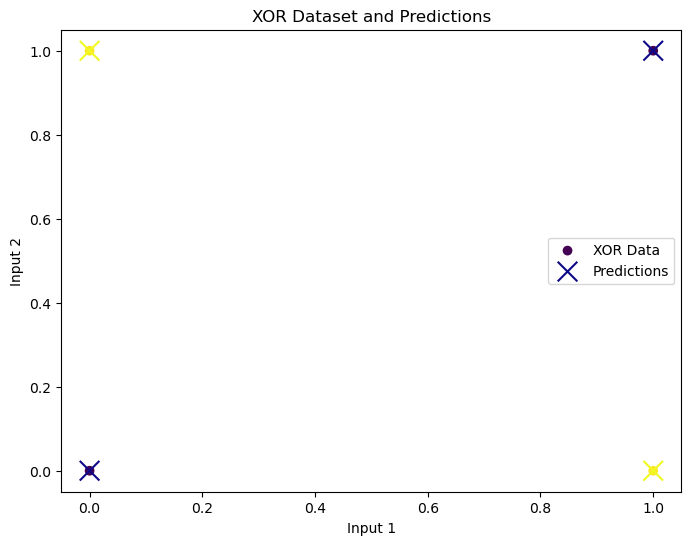

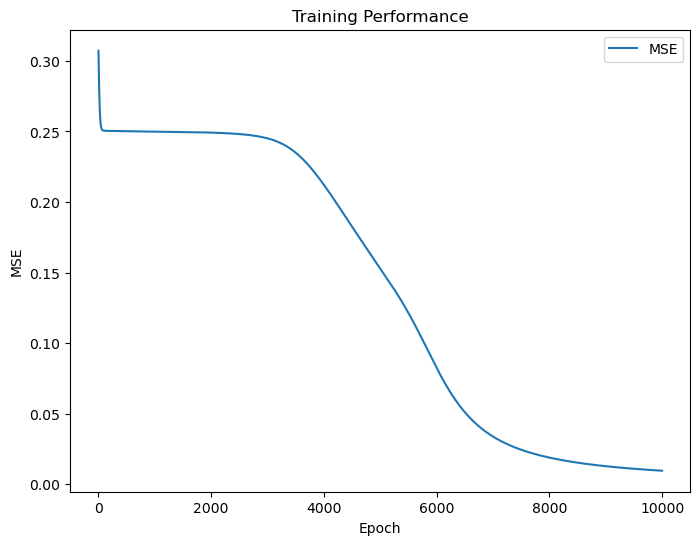

Gayatri Kularni -53004230002


In [1]:


import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the neuralNetwork class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        #Initialize weights with random values
        self.weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))
        
    def forward(self, X):
        #Forward propagation
        self.hidden_input = np.dot(X, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
        self.output = sigmoid(np.dot(self.hidden_output, self.weights_hidden_output))
        return self.output
    
    def backward(self, X, y, learning_rate):
        #Backpropagation
        error_output = y-self.output
        delta_output = error_output * sigmoid_derivative(self.output)
        
        error_hidden = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = error_hidden * sigmoid_derivative(self.hidden_output)
        
        self.weights_hidden_output += self.hidden_output.T.dot(delta_output) * learning_rate
        self.weights_input_hidden += X.T.dot(delta_hidden) * learning_rate
        
    def train(self, X, y, learning_rate, epochs):
        self.loss_history = [] #Track loss dusring training
        for _ in range(epochs):
            output = self.forward(X)
            error = y-output
            self.loss_history.append(np.mean(error**2)) #Track MSE
            self.backward(X, y, learning_rate)
            
    def predict(self, X):
        return self.forward(X)
    
#XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

#Initalize and train the neural network
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X, y, learning_rate, epochs)

#Make predictions
predictions = nn.predict(X)

#Plot the XOR dataset and predictions
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', label='XOR Data')
plt.scatter(X[:,0], X[:,1], c=np.round(predictions), cmap='plasma', marker='x', s=200, label='Predictions')
plt.title('XOR Dataset and Predictions')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()

#PLot the performance (MSE) during training
plt.figure(figsize=(8,6))
plt.plot(nn.loss_history, label='MSE')
plt.title('Training Performance')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Print predictions and actual values
for i in range(len(X)):
    print(f"Input: {X[i]}, Actual: {y[i]}, Predicted: {np.round(predictions[i])}")

plt.show()
print("Gayatri Kularni -53004230002")
